# **CAPSTONE PROJECT MODULE 2**

### Irfanul Zuhdi.N
***

# **DATA UNDERSTANDING**


### **Introduction :**
Database Northwind berisi data penjualan perusahaan fiktif bernama Northwind Traders. Fokus perusahaan dalam bidang mengimpor dan mengekspor beberapa makanan dan minuman khusus dari seluruh dunia. Perusahan fiktif ini melakukan penjualan makanan dan minuman khusus tersebut secara grosir ke gerai seluruh dunia. Basis data ini terdapat 2155 transaksi yang terjadi dengan 89 pelanggan berbeda selama 23 bulan, lengkap dengan informasi mengenai customer, product, detail order, employee, region, shipper, supplier, territories, dan categorie product. Dalam analisis kali ini, berfokus pada produk yang sudah melewati proses transaksi selama 23 bulan (1996 - 1998) pada perusahaan Northwind. Analisis ini bertujuan untuk mengolah data yang ada sehingga menghasilkan suatu informasi penting yang dapat meningkatkan produktivitas perusahaan dan penerapan strategi yang tepat sasaran dalam melakukan transaksi sehingga memperoleh keuntungan yang lebih lagi.

### **Database Information :**

Database yang dimiliki mempunyai 11 tabel, yaitu:
- Categories    : Menyimpan informasi tentang kategori produk
- Customers     : Menyimpan informasi tentang data pelanggan/customer
- Products      : Menyimpan informasi tentang jenis produk
- Orders        : Menyimpan informasi jual-beli yang dilakukan oleh customer
- Orderdetails  : Menyimpan informasi lebih detail terkait order yang dilakukan oleh customer
- Employees     : Menyimpan informasi tentang karyawan serta struktur organisasi dan jabatan setiap karyawan
- Employeeterritories : Menyimpan informasi tentang territoryID dari karyawan
- Region    : Menyimpan informasi tentang region
- Shippers  : Menyimpan informasi tentang shippers yang digunakan oleh perusahaan
- Suppliers : Menyimpan informasi tentang supplier perusahaan
- Territories : Menyimpan informasi tentang wilayah disetiap region

### **Question :**

1. Tampilkan total sale amount dan total quantity berdasarkan kategori produk! serta jabarkan insight yang didapatkan dari grafik tersebut.
3. Tampilkan 10 produk yang paling banyak dipesan (berdasarkan quantity) oleh customer!
4. Tampilkan urutan kategori produk dari yang paling banyak dipesan (berdasarkan quantity) oleh customer!
5. Tampilkan grafik serta jelaskan Total sales per tahun!
6. Pada bulan dan tahun ke berapa keuntungan terbesar yang didapatkan oleh perusahaan Northwind?
7. Tampilkan Top 10 customer yang melakukan pembelian terbanyak selama 23 bulan!
8. Tampilkan dalam bentuk peta dunia (Map) penyebaran customer perusahaan serta total saleamount dan total quantity-nya!
9. Berapa banyak pesanan yang mengalami keterlambatan atau kendala? dan Tampilkan jumlah pesanan berdasarkan hari keterlambatannya!
10. Berapa banyak produk yang memiliki harga per unit diatas rata-rata harga per unit produk?
11. Tampilkan produk apa saja yang sudah tidak lagi dijual? dan berapa sisa total produk tersebut dalam stok?
12. Tampilkan 10 produk termahal yang dijual oleh perusahaan?
13. Tampilkan stok dari produk terlaris yang tersedia saat ini (Unit in Stock best selling product)?

***
# **DATABASE NORTHWIND**

## **Connecting to Database**

Pada bagian ini merupakan langkah awal untuk memulai proses analisis data. Pertama, menghubungkan ke database `northwind` sehingga nantinya dapat mengakses seluruh tabel yang ada pada database

In [2]:
# !pip install mysql-connector-python

# Melakukan instalisasi mysql ke python

In [3]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan import modules yang akan digunakan

In [4]:
# Connect to Database Northwind

db =  sqlcon.connect(
    host = 'localhost',
    user = 'root',
    password = '090667Irfan.',
    database = 'northwind'
)

**Query Function**

Langkah kedua adalah membuat query. Query ini nantinya akan disimpan dalam bentuk DataFrame yang akan digunakan untuk keperluan analisis data northwind. Query yang dibuat akan melibatkan beberapa tabel yang memiliki kolom penting untuk analisis data dan menjawab pertanyaan yang telah dibuat.

In [5]:
# Query Function

curs = db.cursor()
def sql_table (query):
    curs.execute (query)
    result = curs.fetchall()
    tabel_A = pd.DataFrame(result, columns=curs.column_names)
    return tabel_A

***
## **SQL**

**Question:**

1. Apakah tabel products, orders, orderdetails, categories, dan customers dapat digabungkan menjadi 1 tabel? Jika dapat digabungkan, tampilkan tabel yang memuat informasi terkait penjualan produk, total sale amount setiap order, customer yang membeli produk, dan sebagainya yang melibatkan kelima tabel tersebut.
2. Apakah dapat menampilkan kolom baru yang merupakan Sale amount yang didapatkan dari perkalian antara harga per unit dan quantity setiap order yang dilakukan oleh customer?
3. Buatlah tabel yang berisikan total jenis produk yang di order, total quantity setiap produk yang diorder, total ketersedian produk (UnitInStock) dan total sale amount tiap kategori produknya?

### **Data General**

**tabel_A**

Data pertama atau query pertama merupakan data utama yang akan dianalisa lebih lanjut. Query utama ini berisikan gabungan dari beberapa tabel antara lain, `orders`, `orderdetails`, `customer`, `products`, dan `categories`. Karena fokus analisis adalah seluruh hal yang berhubungan dengan produk, maka dipilih kolom dari beberapa tabel yang dapat menghasilkan informasi penting terkait produk dari perusahaan. Informasi yang diambil antara lain:

- CustomerID (orders)               = ID dari setiap customer
- OrderID (orders)                  = ID dari setiap order yang dilakukan oleh customer
- OrderDate (orders)                = Tanggal order dilakukan oleh customer
- RequiredDate (orders)             = Tanggal produk dibutuhkan customer
- ShippedDate (orders)              = Tanggal produk dikirimkan ke customer
- ProductID (products)              = ID dari setiap produk
- ProductName (products)            = Nama setiap produk
- UnitsInStock (products)           = Stok produk yang tersedia saat ini
- Discontinued (products)           = Produk masih dijual atau diberhentikan penjualannya
- UnitPrice (orderdetails)          = Harga per unit tiap produk
- Quantity (orderdetails)           = Quantity setiap produk
- CategoryName (categories)         = Nama kategori produk
- CategoryID (categories)           = ID dari kategori produk
- CompanyName (customers)           = Nama perusahaan customer
- City (customers)                  = Kota dari customer
- Region (customers)                = Region dari customer
- Country (customers)               = Negara dari customer

Selain kolom penting dari beberapa tabel, untuk menambahkan informasi penting, dilakukan gabungan beberapa kolom sehingga menghasilkan kolom baru bernama `SaleAmount`. Kolom `SaleAmount` digunakan untuk informasi total harga penjualan yang didapatkan dari perkalian antara `UnitPrice` harga tiap produk dengan `quantity` atau jumlah produk yang dipesan(diluar biaya kargo `Freight`).

Semua informasi tersebut dijadikan dalam satu tabel (query) dalam bentuk dataframe yang akan diolah informasinya.


In [6]:
# Query 1

tabel_A = sql_table(
    '''
select cu.CustomerID, o.OrderID, p.ProductID, c.CategoryID, c.CategoryName, p.ProductName, cu.CompanyName, cu.City, cu.Region, cu.Country, o.OrderDate as Order_Date, o.RequiredDate, o.ShippedDate,
    round((od.UnitPrice),1) UnitPrice, od.Quantity, p.UnitsInStock, p.Discontinued, round((p.UnitPrice*od.Quantity),1) SaleAmount
from products p
left join orderdetails od on od.ProductID = p.ProductID
left join orders o on o.OrderID = od.OrderID
left join customers cu on o.CustomerID = cu.CustomerID
left join categories c on c.CategoryID = p.CategoryID;
    '''
)

tabel_A.head()

,CustomerID,OrderID,ProductID,CategoryID,CategoryName,ProductName,CompanyName,City,Region,Country,Order_Date,RequiredDate,ShippedDate,UnitPrice,Quantity,UnitsInStock,Discontinued,SaleAmount
0,QUICK,10285,1,1,Beverages,Chai,QUICK-Stop,Cunewalde,None,Germany,1996-08-20,1996-09-17,1996-08-26,14.4,45,39,0,810.0
1,RATTC,10294,1,1,Beverages,Chai,Rattlesnake Canyon Grocery,Albuquerque,NM,USA,1996-08-30,1996-09-27,1996-09-05,14.4,18,39,0,324.0
2,LONEP,10317,1,1,Beverages,Chai,Lonesome Pine Restaurant,Portland,OR,USA,1996-09-30,1996-10-28,1996-10-10,14.4,20,39,0,360.0
3,WANDK,10348,1,1,Beverages,Chai,Die Wandernde Kuh,Stuttgart,None,Germany,1996-11-07,1996-12-05,1996-11-15,14.4,15,39,0,270.0
4,PERIC,10354,1,1,Beverages,Chai,Pericles Comidas clsicas,Mxico D.F.,None,Mexico,1996-11-14,1996-12-12,1996-11-20,14.4,12,39,0,216.0


### **Data Category Product**

**tabel_product**

query kedua merupakan tabel infromasi tambahan yang dikhususkan untuk analisa produk yang terdiri dari, `CategoryName` merupakan kategori produk yang dijual oleh perusahaan northwind, `Total_Produk` merupakan total produk berdasarkan kategori produk, `Jumlah_Quantity` merupakan jumlah kuantitas berdasarkan kategori produk, dan `Produk_Tersedia` merupakan jumlah produk yang tersedia berdasarkan kategori produk. Selain itu, kolom `SaleAmount` berdasarkan kategori produk akan diambil dari tabel_A (query 1). Tabel ini akan memberikan gambaran mengenai kategori produk. Dapat dilihat juga keadaan stok barang yang tersedia sehingga dapat diperkirakan jika ingin menambahkan quantity setiap produk menyesuaikan ketersediaan produk.

In [7]:
# Query 2

tabel_product = sql_table(
    '''
select
    c.CategoryName, count(distinct p.ProductName) as Total_Produk, sum(od.quantity) as Jumlah_Quantity, sum(p.UnitsInStock) as Produk_Tersedia
from products p
left join orderdetails od on od.ProductID = p.ProductID
left join orders o on o.OrderID = od.OrderID
left join categories c on c.CategoryID = p.CategoryID
Group by CategoryName
order by CategoryName;
    '''
)

tabel_product

,CategoryName,Total_Produk,Jumlah_Quantity,Produk_Tersedia
0,Beverages,12,9532,18111
1,Condiments,12,5298,10416
2,Confections,13,7906,7944
3,Dairy Products,10,9149,13424
4,Grains/Cereals,7,4562,7096
5,Meat/Poultry,6,4199,4696
6,Produce,5,2990,2895
7,Seafood,12,7681,21178


In [8]:
Total_Penjualan = tabel_A.groupby('CategoryName')[['SaleAmount']].sum().reset_index()
Total_Penjualan

,CategoryName,SaleAmount
0,Beverages,309582.5
1,Condiments,122344.1
2,Confections,190330.0
3,Dairy Products,269128.3
4,Grains/Cereals,106848.5
5,Meat/Poultry,190683.4
6,Produce,111395.6
7,Seafood,149060.6


In [9]:
# Masukkan Total penjualan dari penjumlahan kolom SaleAmount tabel_A
tabel_product = tabel_product.merge(Total_Penjualan, on='CategoryName')

In [10]:
# Ubah nama kolom
tabel_product = tabel_product.rename(columns={'CategoryName':'Kategori_Produk'})
tabel_product.sort_values('SaleAmount', ascending= False)

,Kategori_Produk,Total_Produk,Jumlah_Quantity,Produk_Tersedia,SaleAmount
0,Beverages,12,9532,18111,309582.5
3,Dairy Products,10,9149,13424,269128.3
5,Meat/Poultry,6,4199,4696,190683.4
2,Confections,13,7906,7944,190330.0
7,Seafood,12,7681,21178,149060.6
1,Condiments,12,5298,10416,122344.1
6,Produce,5,2990,2895,111395.6
4,Grains/Cereals,7,4562,7096,106848.5


***
# **DATA MANIPULATION**

Sebelum melakukan analisis terhadap data tabel_A maupun tabel_product, kita akan melakukan data manipulation. Pada tahapan ini akan melakukan pengecekan data memiliki anomali yang nantinya akan memberikan pengaruh terhadap hasil analisis.Jika memang nanti ada data yang dapat dikatakan mempengaruhi data lainnya, maka perlu dilakukan penanganan terhadap bagian tersebut. Data yang mengganggu tersebut jika memiliki missing value, outlier, kesalahan dalam penulisan, data yang duplikat, tipe data yang masih salah, dan anomali dari data nya. Oleh karena itu, tahapan ini akan melakukan 'pembersihan' terhadap hal-hal yang mengganggu bagi dataset.

In [11]:
# Check info tabel_A
tabel_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2155 non-null   object        
 1   OrderID       2155 non-null   int64         
 2   ProductID     2155 non-null   int64         
 3   CategoryID    2155 non-null   int64         
 4   CategoryName  2155 non-null   object        
 5   ProductName   2155 non-null   object        
 6   CompanyName   2155 non-null   object        
 7   City          2155 non-null   object        
 8   Region        826 non-null    object        
 9   Country       2155 non-null   object        
 10  Order_Date    2155 non-null   datetime64[ns]
 11  RequiredDate  2155 non-null   datetime64[ns]
 12  ShippedDate   2082 non-null   datetime64[ns]
 13  UnitPrice     2155 non-null   object        
 14  Quantity      2155 non-null   int64         
 15  UnitsInStock  2155 non-null   int64   

### **Missing Values**

**Tabel_A: Missing Values**

In [12]:
# Jumlah missing value setiap kolom
tabel_A.isna().sum()

CustomerID         0
OrderID            0
ProductID          0
CategoryID         0
CategoryName       0
ProductName        0
CompanyName        0
City               0
Region          1329
Country            0
Order_Date         0
RequiredDate       0
ShippedDate       73
UnitPrice          0
Quantity           0
UnitsInStock       0
Discontinued       0
SaleAmount         0
dtype: int64

In [13]:
# Persentase Missing Value dalam suatu kolom
tabel_A.isna().sum() / 2155 * 100

CustomerID       0.000000
OrderID          0.000000
ProductID        0.000000
CategoryID       0.000000
CategoryName     0.000000
ProductName      0.000000
CompanyName      0.000000
City             0.000000
Region          61.670534
Country          0.000000
Order_Date       0.000000
RequiredDate     0.000000
ShippedDate      3.387471
UnitPrice        0.000000
Quantity         0.000000
UnitsInStock     0.000000
Discontinued     0.000000
SaleAmount       0.000000
dtype: float64


Jika dilihat dari general info tabel_A yang disajikan di atas. Terlihat bahwa terdapat total data keseluruhan sebanyak 2155 data dengan 17 kolom. Namun, terdapat data yang memiliki missing value (Null Count) yang terlihat pada `Non-Null Count`. Terdapat kolom `Region` memiliki 826 data sehingga dapat dikatakan sisanya sebesar 62,7% data null atau missing value. Selain itu, kolom `ShippedDate` meiliki 2082 data, sehingga sisanya sebesar 3% data null atau missing value. Dalam kasus seperti ini, kita dapat melakukan drop data missing value yang dapat mempengaruhi analisis data. Jika missing value lebih besar 50% dari total data, maka kita dapat melakukan drop secara keseluruhan kolom tersebut. Jika tidak, kolom tersebut dapat memberikan pengaruh yang signifikan kepada data yang lainnya. Untuk kolom ShippedDate karena hanya terdapat 3% missing values, maka drop missing value yang nantinya akan menghilangkan data yang sebaris dengan missing value tersebut. Sehingga total data akan berkurang menjadi 2082 data saja yang diolah.

- Terlihat kolom Region memiliki 1329 data missing values atau dapat dikatakan sebesar 61,67%, dan kolom ShippedDate memiliki 73 (Sebesar 3,38%) data missing values.

### **Data Type**

In [14]:
# Check info tabel_A
tabel_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2155 non-null   object        
 1   OrderID       2155 non-null   int64         
 2   ProductID     2155 non-null   int64         
 3   CategoryID    2155 non-null   int64         
 4   CategoryName  2155 non-null   object        
 5   ProductName   2155 non-null   object        
 6   CompanyName   2155 non-null   object        
 7   City          2155 non-null   object        
 8   Region        826 non-null    object        
 9   Country       2155 non-null   object        
 10  Order_Date    2155 non-null   datetime64[ns]
 11  RequiredDate  2155 non-null   datetime64[ns]
 12  ShippedDate   2082 non-null   datetime64[ns]
 13  UnitPrice     2155 non-null   object        
 14  Quantity      2155 non-null   int64         
 15  UnitsInStock  2155 non-null   int64   

**Tabel_A: Data Type**

Selain berfokus pada missing values, kali ini kita berfokus dengan tipe data tiap features. Jika dilihat dari features berikut: `UnitPrice`, `SaleAmount`.
Kedua features memiliki tipe data (Dtype) object, seharusnya data numerikal harus memiliki tipe data numerikal agar nantinya memudahkan proses analisis data. Oleh karena itu, Kedua feature tersebut harus ditanggulangi tipe data nya menjadi float. Selain itu, kolom `OrderID`, `ProductID`, `CategoryID` sebaiknya dengan tipe string (object).

In [15]:
# Check info tabel_product
tabel_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kategori_Produk  8 non-null      object
 1   Total_Produk     8 non-null      int64 
 2   Jumlah_Quantity  8 non-null      object
 3   Produk_Tersedia  8 non-null      object
 4   SaleAmount       8 non-null      object
dtypes: int64(1), object(4)
memory usage: 384.0+ bytes


**Tabel_product: Missing Values**
- Tidak terdapat missing values pada tabel_product

**Tabel_product: Data Type**
- Tipe data feature `Banyak_Produk`, `Jumlah_Quantity`, dan `SaleAmount` seharusnya ketiga feature tersebut memiliki tipe data numerik, sedangkan informasi Dtype dari general info, untuk tipe data masih object. Oleh karena itu, hal tersebut harus ditanggulangi, ketiga features harus diubah menjadi numerik (float).

## **Handling Anomalies**

Setelah mengetahui data yang memiliki missing values dan tipe data yang tidak sesuai, maka kita akan memproses anomalies tersebut agar data tidak ada lagi anomalies yang dapat mempengaruhi analisis nantinya.

### Drop Missing Values

In [16]:
# Drop kolom Region karena 50% dari total data untuk kolom Region missing value
tabel_A.drop(columns=['Region'], inplace=True)

In [17]:
# Drop baris yang memiliki nilai Null(missing value)
tabel_A.dropna(inplace=True)

In [18]:
# Recheck Info
tabel_A.isna().sum()

# Data sudah bersih dari missing value

CustomerID      0
OrderID         0
ProductID       0
CategoryID      0
CategoryName    0
ProductName     0
CompanyName     0
City            0
Country         0
Order_Date      0
RequiredDate    0
ShippedDate     0
UnitPrice       0
Quantity        0
UnitsInStock    0
Discontinued    0
SaleAmount      0
dtype: int64

### Mengubah Tipe Data (tabel_A dan tabel_product)

In [19]:
# Change Column Format
tabel_A['UnitPrice'] = pd.to_numeric(tabel_A['UnitPrice'])
tabel_A['SaleAmount'] = pd.to_numeric(tabel_A['SaleAmount'])
tabel_A['OrderID'] = tabel_A['OrderID'].apply(str)
tabel_A['ProductID'] = tabel_A['ProductID'].apply(str)
tabel_A['CategoryID'] = tabel_A['CategoryID'].apply(str)

tabel_product['Jumlah_Quantity'] = pd.to_numeric(tabel_product['Jumlah_Quantity'])
tabel_product['Produk_Tersedia'] = pd.to_numeric(tabel_product['Produk_Tersedia'])
tabel_product['SaleAmount'] = pd.to_numeric(tabel_product['SaleAmount'])

- Tipe (Dtype) data setiap kolom sudah sesuai, maksudnya data numerikal sudah bertipe float atau integer, sedangkan kategorikal bertipe object

### **Recheck Missing Values dan Data Type Information**

In [20]:
# Recheck Info tabel_A
tabel_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2152
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2082 non-null   object        
 1   OrderID       2082 non-null   object        
 2   ProductID     2082 non-null   object        
 3   CategoryID    2082 non-null   object        
 4   CategoryName  2082 non-null   object        
 5   ProductName   2082 non-null   object        
 6   CompanyName   2082 non-null   object        
 7   City          2082 non-null   object        
 8   Country       2082 non-null   object        
 9   Order_Date    2082 non-null   datetime64[ns]
 10  RequiredDate  2082 non-null   datetime64[ns]
 11  ShippedDate   2082 non-null   datetime64[ns]
 12  UnitPrice     2082 non-null   float64       
 13  Quantity      2082 non-null   int64         
 14  UnitsInStock  2082 non-null   int64         
 15  Discontinued  2082 non-null   int64   

- Setelah melakukan drop missing values pada tabel_A, maka total baris menjadi 2082 yang siap dilakukan proses pengolahan data. Selain itu, tipe data setiap kolom sudah sesuai dengan seharusnya

In [21]:
# Recheck Info tabel_product
tabel_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kategori_Produk  8 non-null      object 
 1   Total_Produk     8 non-null      int64  
 2   Jumlah_Quantity  8 non-null      float64
 3   Produk_Tersedia  8 non-null      float64
 4   SaleAmount       8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 384.0+ bytes


- Tipe data tiap kolom pada tabel_product sudah sesuai.

### **Data Outlier**

In [22]:
def outliers(col):
    q3 = tabel_A[col].describe().loc['75%']
    q1 = tabel_A[col].describe().loc['25%']
    iqr = q3 -q1

    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    total_outlier = tabel_A[(tabel_A[col] < lower) | (tabel_A[col]> upper)][col].count()

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)
    print('Total Outlier: ', total_outlier)

In [23]:
# Numerical Features in Tabel_A
numerical_feature = [fea for fea in tabel_A.describe().columns]
numerical_feature

['UnitPrice', 'Quantity', 'UnitsInStock', 'Discontinued', 'SaleAmount']

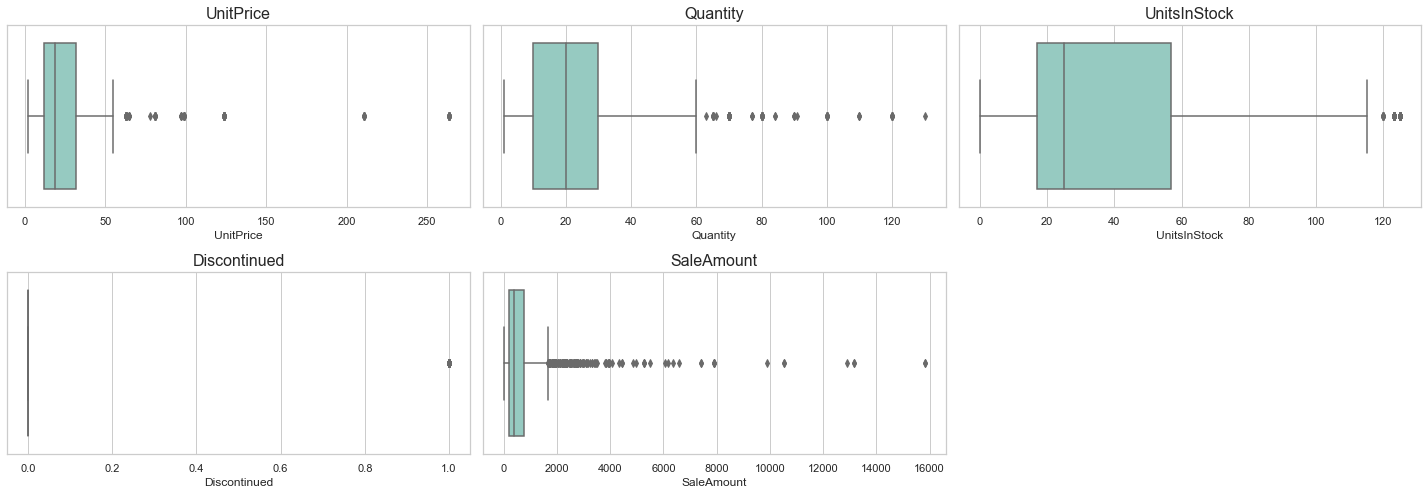

In [24]:
plt.figure(figsize=(20, 10), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in numerical_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=tabel_A);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

In [25]:
# Outliers pada UnitPrice
outliers('UnitPrice')

Upper fence:  62.0
Lower fence:  -18.0
Total Outlier:  97


In [26]:
# Batas Outliers pada SaleAmount
outliers('SaleAmount')

Upper fence:  1661.4999999999998
Lower fence:  -708.8999999999999
Total Outlier:  161


In [27]:
# Batas Outliers pada Quantity
outliers('Quantity')

Upper fence:  60.0
Lower fence:  -20.0
Total Outlier:  84


In [28]:
# Batas Outliers pada UnitInStock
outliers('UnitsInStock')

Upper fence:  117.0
Lower fence:  -43.0
Total Outlier:  96


### **Data Duplicate**

Data yang bersifat duplikat akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Jika tidak ada data yang duplikat, maka tidak perlu ada aksi yang harus dilakukan.

In [29]:
# Check Duplicate
tabel_A[tabel_A.duplicated()]

,CustomerID,OrderID,ProductID,CategoryID,CategoryName,ProductName,CompanyName,City,Country,Order_Date,RequiredDate,ShippedDate,UnitPrice,Quantity,UnitsInStock,Discontinued,SaleAmount


In [30]:
# Check Duplicate
tabel_product[tabel_product.duplicated()]

,Kategori_Produk,Total_Produk,Jumlah_Quantity,Produk_Tersedia,SaleAmount


Tidak terdapat data yang duplikat

***
## **Add New Features**

**Feature 'OnProcess'**

In [31]:
# Feature 'OnProcess'
tabel_A['OnProcess'] = tabel_A['ShippedDate'] - tabel_A['Order_Date']

# Paket sedang diproses untuk pengiriman

**Feature 'DeliveryTime'**

In [32]:
# Feature 'DeliveryTime'
tabel_A['DeliveryTime'] = tabel_A['RequiredDate'] - tabel_A['ShippedDate']

# Waktu pengiriman ke lokasi yang dituju.

In [33]:
tabel_A.sample(5)

,CustomerID,OrderID,ProductID,CategoryID,CategoryName,ProductName,CompanyName,City,Country,Order_Date,RequiredDate,ShippedDate,UnitPrice,Quantity,UnitsInStock,Discontinued,SaleAmount,OnProcess,DeliveryTime
879,TOMSP,10438,34,1,Beverages,Sasquatch Ale,Toms Spezialitten,Mnster,Germany,1997-02-06,1997-03-06,1997-02-14,11.2,20,111,0,280.0,8 days,20 days
245,SEVES,10869,11,4,Dairy Products,Queso Cabrales,Seven Seas Imports,London,UK,1998-02-04,1998-03-04,1998-02-09,21.0,10,22,0,210.0,5 days,23 days
1063,FOLKO,10264,41,8,Seafood,Jack's New England Clam Chowder,Folk och f HB,Brcke,Sweden,1996-07-24,1996-08-21,1996-08-23,7.7,25,85,0,241.3,30 days,-2 days
403,ERNSH,10795,17,6,Meat/Poultry,Alice Mutton,Ernst Handel,Graz,Austria,1997-12-24,1998-01-21,1998-01-20,39.0,35,0,1,1365.0,27 days,1 days
2057,SAVEA,10722,75,1,Beverages,Rhnbru Klosterbier,Save-a-lot Markets,Boise,USA,1997-10-29,1997-12-10,1997-11-04,7.8,42,125,0,325.5,6 days,36 days


In [34]:
# Unique Value

tabel_A['OnProcess'].value_counts()

7 days     271
6 days     241
3 days     187
9 days     184
5 days     177
4 days     176
8 days     174
2 days     149
10 days    129
12 days     45
1 days      43
11 days     34
19 days     23
21 days     20
18 days     19
29 days     19
13 days     17
23 days     15
32 days     15
15 days     14
20 days     13
34 days     13
25 days     13
14 days     12
35 days     12
17 days     11
22 days     11
30 days     11
24 days     11
28 days      8
26 days      5
27 days      4
31 days      3
37 days      2
16 days      1
Name: OnProcess, dtype: int64

In [35]:
# Unique Value

tabel_A['DeliveryTime'].value_counts()
# Terdapat ada beberapa order produk yang mengalami keterlambatan sampai ke lokasi tujuan bedasarkan dari waktu produk dibutuhkan

21 days     227
22 days     191
23 days     165
25 days     160
19 days     159
24 days     158
26 days     145
20 days     139
18 days      98
16 days      39
7 days       37
10 days      37
27 days      35
17 days      34
5 days       31
36 days      31
8 days       30
4 days       27
9 days       24
35 days      23
34 days      23
11 days      22
6 days       21
-1 days      20
13 days      18
-7 days      16
39 days      16
-6 days      15
15 days      15
32 days      15
3 days       11
0 days       10
14 days       8
-4 days       8
30 days       6
-2 days       6
-5 days       6
1 days        6
33 days       6
-16 days      5
2 days        5
12 days       5
37 days       5
-9 days       4
-18 days      4
41 days       3
38 days       3
-8 days       2
-11 days      2
-3 days       2
28 days       2
-23 days      1
-17 days      1
Name: DeliveryTime, dtype: int64

### **Anomali pada Delivery Time**

Terdapat beberapa paket order yang diasumsikan terdapat kendala dalam pengiriman. Dalam kasus ini, kita asumsikan kendala tersebut berupa keterlambatan barang dari waktu yang ditentukan. Berikut merupakan data paket yang mengalami keterlambatan:

1. -1 days      = 20 paket
2. -7 days      = 16 paket
3. -6 days      = 15 paket
4. -4 days      = 8 paket
5. -5 days      = 2 paket
6. -2 days      = 2 paket
7. -16 days     = 5 paket
8. -9 days      = 4 paket
9. -18 days     = 4 paket
10. -8 days     = 2 paket
11. -11 days    = 2 paket
12. -3 days     = 2 paket
13. -23 days    = 1 paket
14. -17 days    = 1 paket

Total paket yang mengalami keterlambatan sebanyak: 84 paket

## **Ubah value dari feature 'Discontinued'**

In [36]:
tabel_A['Discontinued'] = tabel_A['Discontinued'].apply(lambda x: 'yes' if x > 0 else 'no')
tabel_A['Discontinued']

0       no
1       no
2       no
3       no
4       no
        ..
2148    no
2149    no
2150    no
2151    no
2152    no
Name: Discontinued, Length: 2082, dtype: object

In [37]:
tabel_A.head()

,CustomerID,OrderID,ProductID,CategoryID,CategoryName,ProductName,CompanyName,City,Country,Order_Date,RequiredDate,ShippedDate,UnitPrice,Quantity,UnitsInStock,Discontinued,SaleAmount,OnProcess,DeliveryTime
0,QUICK,10285,1,1,Beverages,Chai,QUICK-Stop,Cunewalde,Germany,1996-08-20,1996-09-17,1996-08-26,14.4,45,39,no,810.0,6 days,22 days
1,RATTC,10294,1,1,Beverages,Chai,Rattlesnake Canyon Grocery,Albuquerque,USA,1996-08-30,1996-09-27,1996-09-05,14.4,18,39,no,324.0,6 days,22 days
2,LONEP,10317,1,1,Beverages,Chai,Lonesome Pine Restaurant,Portland,USA,1996-09-30,1996-10-28,1996-10-10,14.4,20,39,no,360.0,10 days,18 days
3,WANDK,10348,1,1,Beverages,Chai,Die Wandernde Kuh,Stuttgart,Germany,1996-11-07,1996-12-05,1996-11-15,14.4,15,39,no,270.0,8 days,20 days
4,PERIC,10354,1,1,Beverages,Chai,Pericles Comidas clsicas,Mxico D.F.,Mexico,1996-11-14,1996-12-12,1996-11-20,14.4,12,39,no,216.0,6 days,22 days


In [38]:
tabel_A.describe()

,UnitPrice,Quantity,UnitsInStock,SaleAmount,OnProcess,DeliveryTime
count,2082.000000,2082.000000,2082.000000,2082.000000,2082,2082
mean,26.384438,24.072526,39.762728,682.963064,8 days 08:17:17.463976945,19 days 11:11:35.100864553
std,30.222844,18.890082,36.062315,1121.103449,6 days 16:37:41.880301151,8 days 20:21:36.956543429
min,2.000000,1.000000,0.000000,6.000000,1 days 00:00:00,-23 days +00:00:00
25%,12.000000,10.000000,17.000000,180.000000,4 days 00:00:00,18 days 00:00:00
50%,18.400000,20.000000,25.000000,385.700000,7 days 00:00:00,21 days 00:00:00
75%,32.000000,30.000000,57.000000,772.600000,9 days 00:00:00,24 days 00:00:00
max,263.500000,130.000000,125.000000,15810.000000,37 days 00:00:00,41 days 00:00:00


## **Pengecekan Harga Per Unit Produk**

In [39]:
tabel_A[tabel_A['ProductName']=='Guaran Fantstica'][['ProductName','UnitPrice']].nunique()

ProductName    1
UnitPrice      2
dtype: int64

In [40]:
tabel_A[tabel_A['ProductName']=='Guaran Fantstica'][['ProductName','UnitPrice']].sample(5)

,ProductName,UnitPrice
598,Guaran Fantstica,4.5
592,Guaran Fantstica,4.5
575,Guaran Fantstica,3.6
615,Guaran Fantstica,4.5
585,Guaran Fantstica,4.5


- Dari salah satu produk tersebut menggambarkan bahwa terdapat ada beberapa harga per unit dari produk yang sama. Sehingga harus diambil keputusan, untuk menganalisis average dari unit per price tiap produk.

***
## **GENERAL CLEANED DATA**

In [41]:
listItem = []
for col in tabel_A.columns:
    listItem.append([col, tabel_A[col].dtype, len(tabel_A), tabel_A[col].isna().sum(), round((tabel_A[col].isna().sum()/len(tabel_A[col]))* 100, 2),
                    tabel_A[col].nunique(), list(tabel_A[col].drop_duplicates().sample(2).values)])

tabel_ADesc = pd.DataFrame(columns=['Column Name', 'Data Type',' Data Count', 'Missing Value', 'Missing Value Percentage', 'Member of Unique', 'Unique Sample'],
                    data=listItem)
tabel_ADesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Member of Unique,Unique Sample
0,CustomerID,object,2082,0,0.0,89,"[ANTON, ALFKI]"
1,OrderID,object,2082,0,0.0,809,"[10818, 10566]"
2,ProductID,object,2082,0,0.0,77,"[62, 19]"
3,CategoryID,object,2082,0,0.0,8,"[8, 2]"
4,CategoryName,object,2082,0,0.0,8,"[Produce, Seafood]"
5,ProductName,object,2082,0,0.0,77,"[Boston Crab Meat, Perth Pasties]"
6,CompanyName,object,2082,0,0.0,89,"[La corne d'abondance, Tortuga Restaurante]"
7,City,object,2082,0,0.0,69,"[Strasbourg, Genve]"
8,Country,object,2082,0,0.0,21,"[Austria, Switzerland]"
9,Order_Date,datetime64[ns],2082,0,0.0,478,"[1996-10-04T00:00:00.000000000, 1996-08-02T00:..."


***
## **Correlation**

In [44]:
corr_tabel_A = tabel_A[['UnitPrice','Quantity','SaleAmount']].corr('spearman')
corr_tabel_A

,UnitPrice,Quantity,SaleAmount
UnitPrice,1.000000,0.011724,0.635532
Quantity,0.011724,1.000000,0.734559
SaleAmount,0.635532,0.734559,1.000000


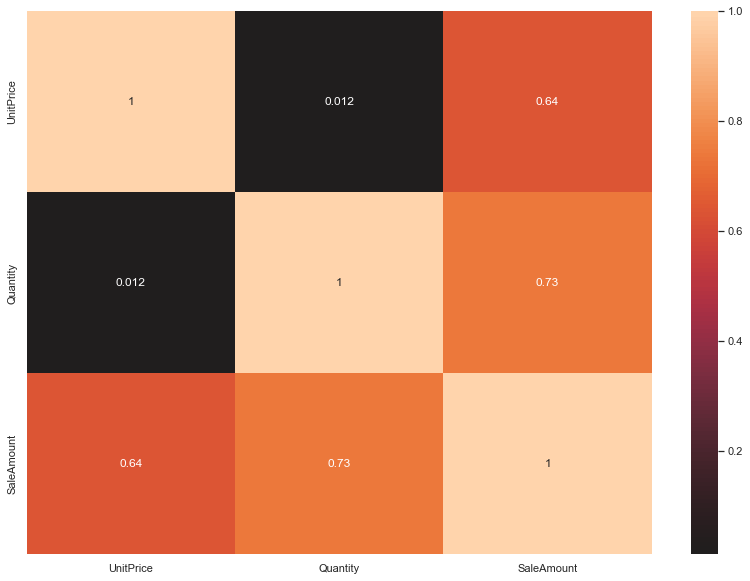

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(data=corr_tabel_A, center=0, annot= True)
# annot = memunculkan nilai korelasi
# center = mengubah warna + menggunakan cmap
plt.show()

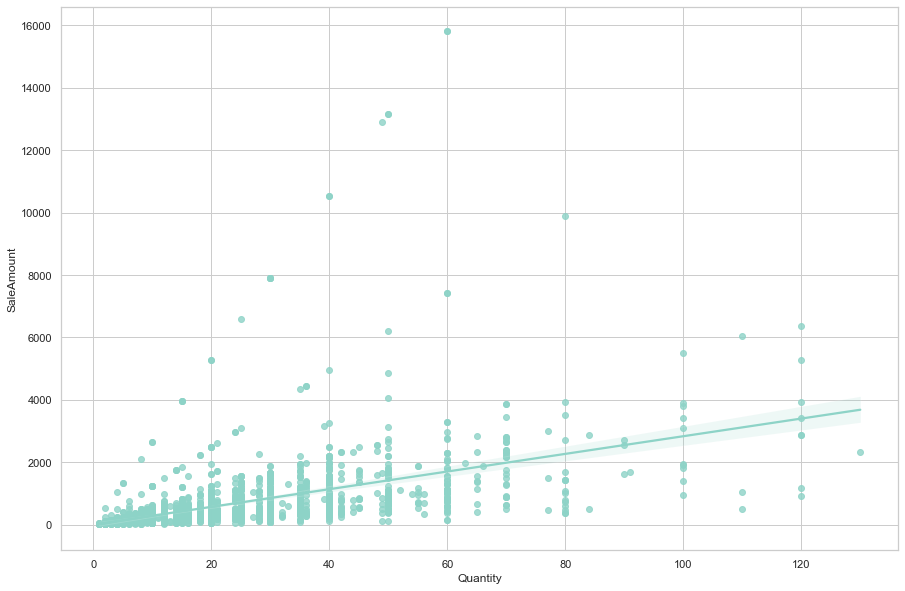

In [46]:
# Korelasi Antara Quantity dan SaleAmount

plt.figure(figsize=(15,10))
sns.regplot(data=tabel_A, x='Quantity', y='SaleAmount')
plt.show()

In [47]:
# Total bulan setiap tahun nya
tabel_A['Month']= pd.to_datetime(tabel_A['ShippedDate']).dt.month
tabel_A['Year']= pd.to_datetime(tabel_A['ShippedDate']).dt.year
tabel_A.head()

,CustomerID,OrderID,ProductID,CategoryID,CategoryName,ProductName,CompanyName,City,Country,Order_Date,...,ShippedDate,UnitPrice,Quantity,UnitsInStock,Discontinued,SaleAmount,OnProcess,DeliveryTime,Month,Year
0,QUICK,10285,1,1,Beverages,Chai,QUICK-Stop,Cunewalde,Germany,1996-08-20,...,1996-08-26,14.4,45,39,no,810.0,6 days,22 days,8,1996
1,RATTC,10294,1,1,Beverages,Chai,Rattlesnake Canyon Grocery,Albuquerque,USA,1996-08-30,...,1996-09-05,14.4,18,39,no,324.0,6 days,22 days,9,1996
2,LONEP,10317,1,1,Beverages,Chai,Lonesome Pine Restaurant,Portland,USA,1996-09-30,...,1996-10-10,14.4,20,39,no,360.0,10 days,18 days,10,1996
3,WANDK,10348,1,1,Beverages,Chai,Die Wandernde Kuh,Stuttgart,Germany,1996-11-07,...,1996-11-15,14.4,15,39,no,270.0,8 days,20 days,11,1996
4,PERIC,10354,1,1,Beverages,Chai,Pericles Comidas clsicas,Mxico D.F.,Mexico,1996-11-14,...,1996-11-20,14.4,12,39,no,216.0,6 days,22 days,11,1996


In [48]:
# Hitung Jumlah Bulan setiap Tahun
print('Jumlah Bulan di Tahun 1996: ', tabel_A[tabel_A['Year']==1996][['Month']].nunique())
print('Jumlah Bulan di Tahun 1997: ', tabel_A[tabel_A['Year']==1997][['Month']].nunique())
print('Jumlah Bulan di Tahun 1998: ', tabel_A[tabel_A['Year']==1998][['Month']].nunique())

Jumlah Bulan di Tahun 1996:  Month    6
dtype: int64
Jumlah Bulan di Tahun 1997:  Month    12
dtype: int64
Jumlah Bulan di Tahun 1998:  Month    5
dtype: int64


***
# **Statistics**

## **Normally Test**
### Uji Normalitas pada SaleAmount Setiap Produk

In [49]:
from scipy.stats import normaltest

normaltest(tabel_A['SaleAmount'])

NormaltestResult(statistic=2617.656200700576, pvalue=0.0)

In [50]:
dp_stat, dp_pval = normaltest(tabel_A['SaleAmount'])

if dp_pval > 0.05:
    print(f'pvalue:{dp_pval}, kita asumsikan datanya terdistribusi normal')
else:
    print(f'pvalue:{dp_pval}, kita TIDAK asumsikan datanya terdistribusi normal')

pvalue:0.0, kita TIDAK asumsikan datanya terdistribusi normal


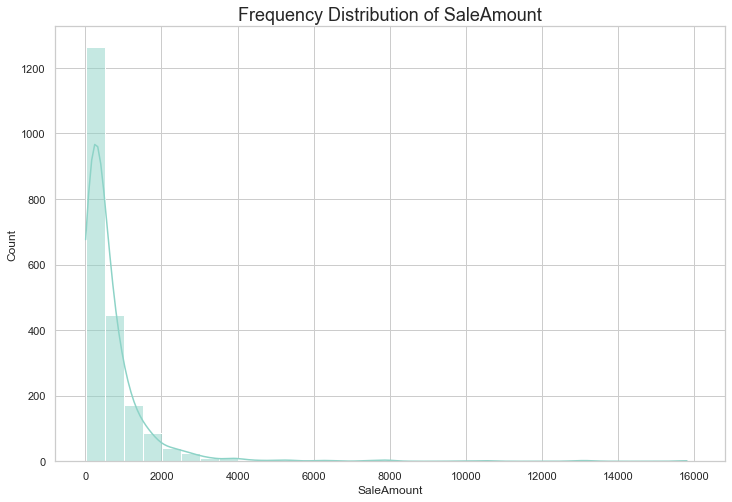

In [51]:
# Distribusi tidak normal (skewed positif) skewed kanan
plt.figure(figsize=(12,8))
sns.histplot(data= tabel_A, x= 'SaleAmount', binwidth= 500, kde = True)
plt.title('Frequency Distribution of SaleAmount', size = 18)
plt.show()

### Uji Normalitas pada Quantity Setiap Produk

In [52]:
normaltest(tabel_A['Quantity'])

NormaltestResult(statistic=742.1238134172776, pvalue=7.077200050530613e-162)

In [53]:
dp_stat, dp_pval = normaltest(tabel_A['Quantity'])

if dp_pval > 0.05:
    print(f'pvalue:{dp_pval}, kita asumsikan datanya terdistribusi normal')
else:
    print(f'pvalue:{dp_pval}, kita TIDAK asumsikan datanya terdistribusi normal')

pvalue:7.077200050530613e-162, kita TIDAK asumsikan datanya terdistribusi normal


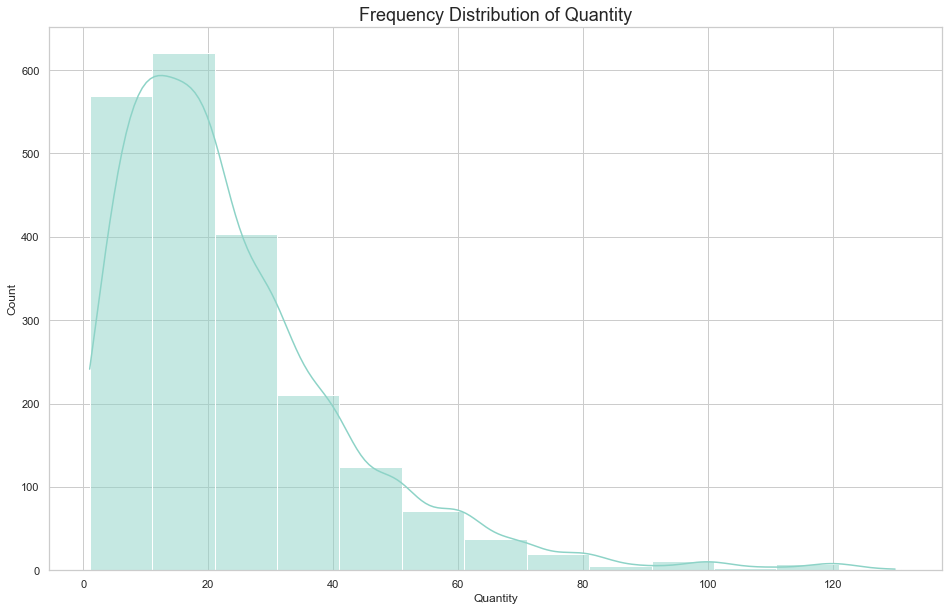

In [54]:
# Distribusi tidak normal (skewed positif) skewed kanan
plt.figure(figsize=(16,10))
sns.histplot(data= tabel_A, x= 'Quantity', binwidth= 10, kde = True)
plt.title('Frequency Distribution of Quantity', size = 18)
plt.show()

## **Kruskal Wallis (Independent)**

In [55]:
# Import Library Kruskal Wallis

from scipy.stats import kruskal
fstat, pvalue = kruskal(*[tabel_A[tabel_A['ProductName'] == i]['SaleAmount'] for i in tabel_A['ProductName'].unique()])
print('Nilai pvalue: ', pvalue)

Nilai pvalue:  5.867339004656441e-148


In [56]:
if pvalue > 0.05:
    print('P-Value > 0.05, failed to reject Ho, Tidak Terdapat Perbedaan Nilai Median pada Sale Amount untuk Setiap Produk Yang Ada')
else:
    print('p-value <= 0.05, reject Ho, Terdapat Perbedaan Nilai Median pada Sale Amount untuk Setiap Produk Yang Ada')

p-value <= 0.05, reject Ho, Terdapat Perbedaan Nilai Median pada Sale Amount untuk Setiap Produk Yang Ada


In [57]:
tabel_A.groupby('ProductName').median()['SaleAmount']

ProductName
Alice Mutton                        780.0
Aniseed Syrup                       250.0
Boston Crab Meat                    368.0
Camembert Pierrot                   816.0
Carnarvon Tigers                   1250.0
                                    ...  
Uncle Bob's Organic Dried Pears     600.0
Valkoinen suklaa                    390.0
Vegie-spread                        878.0
Wimmers gute Semmelkndel            731.5
Zaanse koeken                       199.5
Name: SaleAmount, Length: 77, dtype: float64

In [58]:
# Save to csv
tabel_A.to_csv('Northwind.csv', index=False) 